# Flight price prediction model

# Complete case study of ML algorithms with respect to data available

# 1. Expolatory Data analysis

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load your data
df= pd.read_csv('sastaticket_train.csv')
df.shape

(5000, 14)

In [3]:
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [4]:
print('rows,columns', df.shape)

rows,columns (5000, 14)


In [5]:
# strucrue of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  5000 non-null   int64  
 1   Unnamed: 0    5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.1  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [6]:
# check null values
df.isnull().sum()
# no null value, data is calean

Unnamed: 0.2    0
Unnamed: 0      0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.1    0
target          0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0.2,Unnamed: 0,f8,f9,Unnamed: 0.1,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [8]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.1', 'target'],
      dtype='object')

In [9]:
# Dropping unnammed columns which a re not required in data
df= df.drop(columns= ['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1'], axis=1)

In [10]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [11]:
df['f6'].unique()

array(['gamma', 'alpha', 'beta', 'omega'], dtype=object)

In [12]:
# Feature engineering
# finding unique values in catagorical list

cat_list= ['f2', 'f3', 'f6', 'f8', 'f9', 'f10']

# now making loop to finding unique values in each catagorical columns
for i in cat_list:
    print(i, df[i].unique())
    print('-----------------') # seperator line to add some beauty


f2 ['x']
-----------------
f3 ['y']
-----------------
f6 ['gamma' 'alpha' 'beta' 'omega']
-----------------
f8 [ 0. 35. 20. 15. 32. 40. 45.]
-----------------
f9 [0 1 2]
-----------------
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
-----------------


**based upon above data, f2,f3 and f10 will be removed as not much linked to data as x,y only 1 unique value so departure and destination is same in all.similarly flight number is not linked to fare as it doesnt display with prices and have no impact on price.based on these things, we will drop those columns.**

In [13]:
# Dropping columns which a re not required in data and update df
df= df.drop(columns= ['f2','f3','f10'], axis=1)
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [14]:
# now we will convert time into seconds 
# 1. time left for departure when purchasing ticket( )
# 2. total flight time

In [15]:
# first we need to check catagories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 278.4+ KB


In [16]:
# type casting

df['f1']= pd.to_datetime(df['f1'])
df['f4']= pd.to_datetime(df['f4'])
df['f5']= pd.to_datetime(df['f5'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


In [17]:
# now subtracting times and converting into seconds before calculation

df.insert(0, 'time_to_dep(s)', ((df['f4']-df['f1']).astype('timedelta64[s]')), True)
df.insert(1, 'travel_time(s)', ((df['f5']-df['f4']).astype('timedelta64[s]')), True)

In [18]:
# df['f6']= df['f6'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time_to_dep(s)  5000 non-null   float64            
 1   travel_time(s)  5000 non-null   float64            
 2   f1              5000 non-null   datetime64[ns, UTC]
 3   f4              5000 non-null   datetime64[ns, UTC]
 4   f5              5000 non-null   datetime64[ns, UTC]
 5   f6              5000 non-null   object             
 6   f7              5000 non-null   bool               
 7   f8              5000 non-null   float64            
 8   f9              5000 non-null   int64              
 9   target          5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(4), int64(1), object(1)
memory usage: 356.6+ KB


In [20]:
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [21]:
df.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

In [22]:
# seperating catagorical columns and numerical columns into varibales

cat_cols= ['f6','f7','f8','f9']
num_cols= ['time_to_dep(s)', 'travel_time(s)']

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\

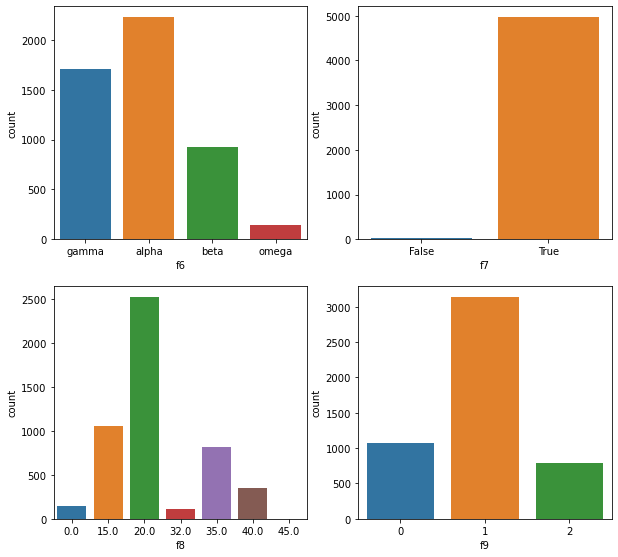

In [23]:
# now plotting categorical count plot
c=1
plt.figure(figsize=(10,30))
for i in cat_cols:
    plt.subplot(6,2,c)
    sns.countplot(df[i])
    c=c+1
plt.show()
# why is it not working?
# worked on previous version or said i ran on conda env it worked.

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\hp\anaconda3\lib\site-packages\

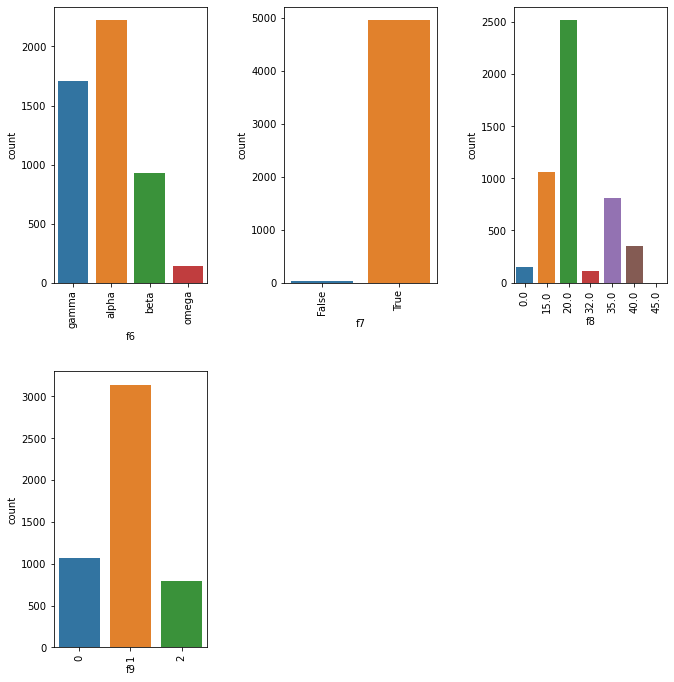

In [24]:
c=1
plt.figure(figsize=(10,30))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
# it converts lables on x vertical

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


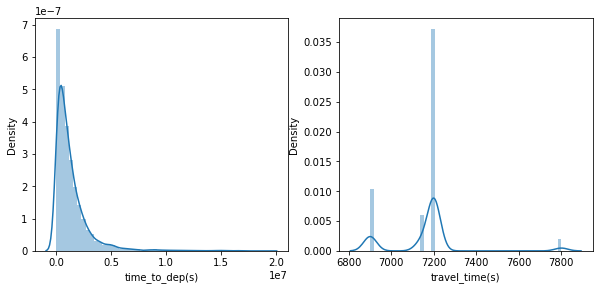

In [25]:
# now plotting numerical coluns
c=1
plt.figure(figsize=(10,30))
for i in num_cols:
    plt.subplot(6,2,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

**now check whether data is normal or not**

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

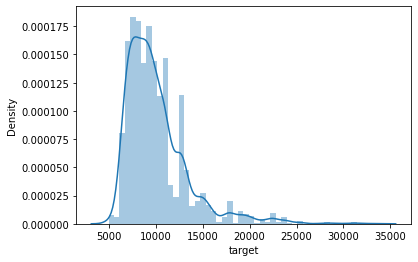

In [26]:
# now plotting target

sns.distplot(df.target)

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

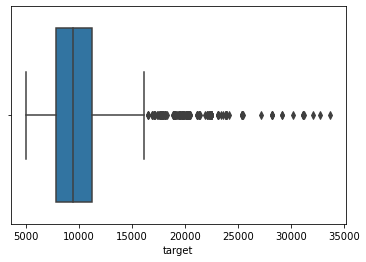

In [27]:
sns.boxplot(df.target)

In [28]:
# task: outliers removal but after checking also skewness and kurtosis


In [29]:
# now check skewness and kurtosis

df.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_1508\2954304398.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


time_to_dep(s)     3.703644
travel_time(s)     1.319374
f7               -11.660949
f8                 0.418300
f9                 0.027547
target             2.056345
dtype: float64

In [30]:
df.kurtosis()

C:\Users\hp\AppData\Local\Temp\ipykernel_1508\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target              6.344666
dtype: float64

In [31]:
# encoding of variables

df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [32]:
df= df.drop(columns= ['f1', 'f4','f5'], axis=1)

In [33]:
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0


In [34]:
# encoding(converting categories into 0,1,2) etc
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
# apply label encoder

df['f6']= le.fit_transform(df['f6'])
df['f7']= le.fit_transform(df['f7'])
df['f8']= le.fit_transform(df['f8'])
df.head(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,2,1,0,0,7400.0
1,29688.0,7200.0,0,1,4,1,15377.0
2,3033072.0,7200.0,2,1,2,1,6900.0
3,363011.0,7200.0,0,1,1,1,9707.0
4,2142368.0,6900.0,1,1,2,0,6500.0
5,256252.0,7200.0,2,1,3,1,9655.0
6,843009.0,6900.0,1,1,2,0,7300.0
7,5715561.0,7200.0,2,1,2,1,8650.0
8,422528.0,7200.0,0,1,1,1,12945.0
9,2906185.0,7200.0,0,1,1,1,9497.0


In [36]:
# now some statistics
df.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


In [37]:
# now check if data needs to be normalize then do this proccessing

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
# it only applies on numerical varibales.

In [38]:
# df['time_to_dep(s)']= ss.fit_transform(df['time_to_dep(s)'])
# df['travel_time(s)']= ss.fit_transform(df['travel_time(s)'])
# df['target']= ss.fit_transform(df['target'])

In [39]:
df.columns

Index(['time_to_dep(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9', 'target'], dtype='object')

In [40]:
# now spplitting data into x and y
x= df[['time_to_dep(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9']] # or only drop target from x, x= df.drop(['target], axis=1)
y= df['target']

# ML Modeling

In [41]:
# Now ML modeling
# as numeric value so we use regression analysis


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #these are metrices of regressor.
# for classification: f1, precision score and recall score.

In [47]:
# root mean square erro

# rmse= mean_squared_error(y_test, y_pred, squared=False)

In [44]:
# converting to shorter form
lr= LinearRegression()
dt= DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()


In [45]:
# Designing model loop and apply all models in same data and check accuracy, and bring that model with higher accuracy.
# screen and print that model.

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

for i in [lr,dt,svr,knr]: # read all models
    i.fit(x_train,y_train) # fitting all models
    pred= i.predict(x_test) # predicting
    score= r2_score(y_test, pred) # test score
    train_score= r2_score(y_train, i.predict(x_train)) # train score
    if abs(train_score - score) <= 0.1:
        print(i)
        print("r2_score is: ", r2_score(y_test, pred))
        

LinearRegression()
r2_score is:  0.08245769682272552
SVR()
r2_score is:  -0.06121290745272212


in below formula pls explain meaning of <= 0.1:

for i in [lr,dt,svr,knr]: # read all models
    i.fit(x_train,y_train) # fitting all models
    pred= i.predict(x_test) # predicting
    score= r2_score(y_test, pred) # test score
    train_score= r2_score(x_train, i.predict(x_train)) # train score
    if abs(train_score - score) <= 0.1:
The if statement checks if the difference between train_score and score is less than or equal to 0.1. The abs function calculates the absolute value of the difference, which means the value of the difference without considering its sign (positive or negative).

So, if the difference between the training score and test score is less than or equal to 0.1, this indicates that the model has a low variance and is not overfitting the training data. Overfitting occurs when a model is too complex and memorizes the training data, but cannot generalize well to new unseen data (the test data in this case).

what happens if we increase value from 0.1?

If we increase the value from 0.1, it will result in a larger difference between the training score and the test score, which indicates that the model may be overfitting to the training data. Overfitting occurs when a model is too complex and has learned the noise or random variations in the training data instead of generalizing to new unseen data. An increase in the difference between the training and test scores is an indication of overfitting and requires the model to be revised or a different model to be used.

In [46]:
for i in [lr,dt,svr,knr]: # read all models
    i.fit(x_train,y_train) # fitting all models
    pred= i.predict(x_test) # predicting
    score= r2_score(y_test, pred) # test score
    train_score= r2_score(y_train, i.predict(x_train)) # train score
    if abs(train_score - score) <= 0.1:
        print(i)
        print("r2_score is: ", r2_score(y_test, pred))
        print('mean_absolute_error: ', mean_absolute_error(y_test, pred))
        print('mean_squared_error: ', mean_squared_error(y_test, pred))
        print('rmse: ', mean_squared_error(y_test, pred, squared = False))
        print('-----------------------------------------------')


LinearRegression()
r2_score is:  0.08245769682272552
mean_absolute_error:  2175.6552919422875
mean_squared_error:  9604880.48361756
rmse:  3099.174161549744
-----------------------------------------------
SVR()
r2_score is:  -0.06121290745272212
mean_absolute_error:  2234.394635530172
mean_squared_error:  11108831.830924733
rmse:  3332.991423770054
-----------------------------------------------


In [48]:
df1= pd.read_csv('sastaticket_test.csv')

In [50]:
# made a mistake, we wrangled data but test data read is not cleaned so we need to apply those steps on it too and then we can predict.

In [51]:
df1.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [52]:
# so need to pass them through same steps then separating x and y data(y will contain only target column)

In [ ]:
# to save prediction

# result= pd.DataFrame(pred)
# result.index= x_test.index #its important for comparison
# result.columns= ['Predictions']
# result.to_csv('final_prediction_with_traintestsplit.csv')